In [1]:
from autocluster import AutoCluster
from evaluators import get_evaluator
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'Birch', 
        'MiniBatchKMeans', 'AgglomerativeClustering', 'OPTICS', 
        'SpectralClustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD'
    ],
    "n_evaluations": 100,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 20,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .01),
    "n_folds": 3,
    "warmstart": True,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": [],
}
result_dict = cluster.fit(**fit_params)

1302/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_

Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'abort_on_first_run_crash': False, 'run_obj': 'quality', 'output_dir': 'log//smac-2019-07-26_16-23-42-63817', 'runcount-limit': 100, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat

Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 2, 'n_clusters___Birch': 5, 'branching_factor___Birch': 10, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 2, 'n_clusters___Birch': 5, 'branching_factor___Birch': 32, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 2, 'n_clusters___Birch': 5, 'branching_factor___Birch': 64, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 2, 'n_clusters___Birch': 6, 'branching_factor___Birch': 10, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'poly', 'affinity___SpectralClustering': 'laplacian', 'n_clusters___SpectralClustering': 9, 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'poly', 'affinity___SpectralClustering': 'laplacian', 'n_clusters___SpectralClustering': 11, 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'poly', 'affinity___SpectralClustering': 'laplacian', 'n_clusters___SpectralClustering': 13, 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'l1', 'clustering_choice': 'OPTICS', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'min_samples___OPTICS': 787}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/hom

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'poly', 'affinity___SpectralClustering': 'laplacian', 'n_clusters___SpectralClustering': 10, 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 5, 'n_clusters___Birch': 9, 'branching_factor___Birch': 83, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'poly', 'clustering_choice': 'AgglomerativeClustering', 'affinity___AgglomerativeClustering': 'l2', 'linkage___AgglomerativeClustering': 'average', 'n_components___KernelPCA': 8, 'n_clusters___AgglomerativeClustering': 15, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'KMeans', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___PCA': 2, 'clustering_choice': 'Birch', 'n_clusters___Birch': 3, 'branching_factor___Birch': 50, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'auto'}
Score obtained by this configuration: 0.2990189647870227
Fitting configuration: 
{'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 10, 'perplexity___TSNE': 250.7576475481927, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2}
Fitting configuration: 
{'affinity___SpectralClustering': 'rbf', 'early_exaggeration___TSNE': 12.86122333165967, 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 3, 'perplexity___TSNE': 237.68038043104409, 'n_components___TSNE': 2, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'SpectralClustering'}
Fitting configuration: 
{'early_exaggeration___TSNE': 5.92345241675155, 'ba

Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/hom

Fitting configuration: 
{'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'clustering_choice': 'KMeans', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29}
Score obtained by this configuration: 0.34873471690366076
Fitting configuration: 
{'affinity___AffinityPropagation': 'euclidean', 'kernel___KernelPCA': 'cosine', 'clustering_choice': 'AffinityPropagation', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.3373650514921282
Fitting configuration: 
{'kernel___KernelPCA': 'cosine', 'batch_size___MiniBatchKMeans': 668, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 9, 'n_components___KernelPCA': 2, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.30841402180909433
Fitting configuration: 
{'kernel___KernelPCA': 'cosine', 'batch_size___MiniBatchKMeans': 362, 'clustering_choice': 'MiniBatchKMeans', 'n_c

Fitting configuration: 
{'kernel___KernelPCA': 'cosine', 'covariance_type___GaussianMixture': 'diag', 'clustering_choice': 'GaussianMixture', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.3478338040978561
Fitting configuration: 
{'kernel___KernelPCA': 'cosine', 'clustering_choice': 'AgglomerativeClustering', 'affinity___AgglomerativeClustering': 'euclidean', 'linkage___AgglomerativeClustering': 'ward', 'n_components___KernelPCA': 3, 'n_clusters___AgglomerativeClustering': 28, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.35541355165870875
Fitting configuration: 
{'algorithm___TruncatedSVD': 'randomized', 'covariance_type___GaussianMixture': 'diag', 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True, 'init_params___GaussianMixture': 'random', 'dim_reduction_choice': 'TruncatedSVD', 'n_compon

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (len(centroids)

Score obtained by this configuration: 0.3073029425573336
Fitting configuration: 
{'batch_size___MiniBatchKMeans': 191, 'n_components___PCA': 3, 'svd_solver___PCA': 'arpack', 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 6, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.32995102050054376
Fitting configuration: 
{'min_samples___DBSCAN': 85, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.33357409867392923, 'n_components___KernelPCA': 2, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'min_samples___DBSCAN': 30, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.4911184393167958, 'n_components___KernelPCA': 3, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'min_samples___DBSCAN': 8, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.46609068939941084, 'n_components___KernelPCA': 3, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'min_samples___DBSCAN': 13, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.42763622817394803, 'n_components___KernelPCA': 3, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'min_samples___DBSCAN': 10, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.3597676486445218, 'n_components___KernelPCA': 3, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'min_samples___DBSCAN': 73, 'early_exaggeration___TSNE': 13.486116543319527, 'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2}


In [14]:
result_dict['metafeatures'][0]

array([ 7.28000825e+00,  0.00000000e+00,  0.00000000e+00,  4.89371554e-01,
        1.45100000e+03,  1.44600069e+03,  1.80591445e-01, -5.98208294e-01,
       -1.42356631e+00,  0.00000000e+00, -3.00000000e+00, -1.11403012e-02,
       -2.51757975e-01,  9.27284850e-01, -8.07725984e-01,  4.37500000e-01,
        6.01279269e+00, -9.17630852e-02,  3.80526042e+01,  4.89371554e-01,
       -8.46963666e-01,  4.27892564e+01,  2.54027097e-02,  3.74324201e+00,
       -1.93527394e+01,  2.38688385e+00,  6.24879644e-02,  2.00430975e-01,
        2.94463539e-01, -1.37877117e+00,  4.41589963e-03,  8.80353297e+01,
       -4.35831412e-01])

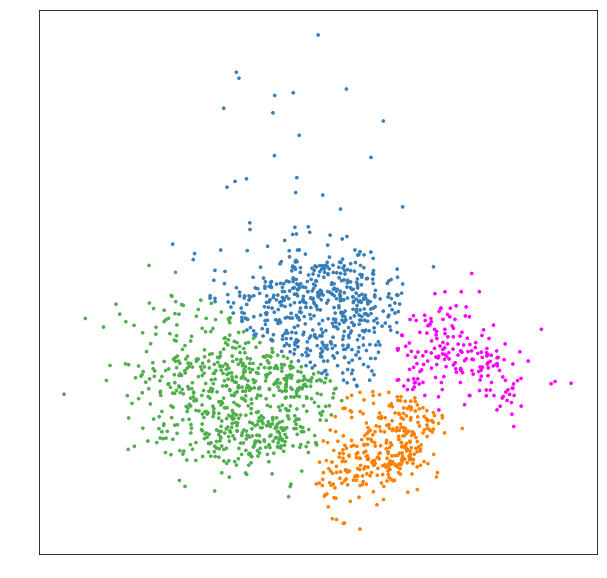

In [15]:
predictions = cluster.predict(df)

In [16]:
Counter(predictions)

Counter({0: 575, 1: 335, 2: 689, 3: 198})

In [17]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.4846394526181437

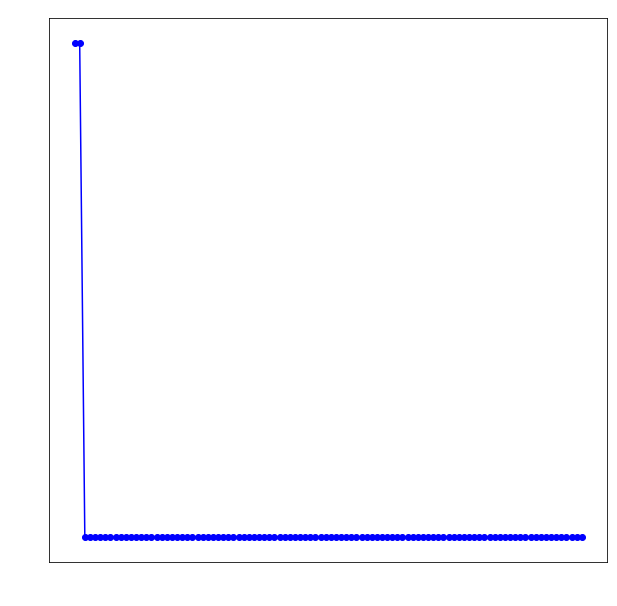

In [18]:
cluster.plot_convergence()

In [19]:
cluster.get_trajectory()

[({'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 12.0,
   'n_clusters___KMeans': 5,
   'n_components___TSNE': 2,
   'perplexity___TSNE': 30.0},
  2147483648),
 ({'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 12.0,
   'n_clusters___KMeans': 5,
   'n_components___TSNE': 2,
   'perplexity___TSNE': 30.0},
  2147483647.0),
 ({'affinity___SpectralClustering': 'laplacian',
   'algorithm___TruncatedSVD': 'randomized',
   'assign_labels___SpectralClustering': 'kmeans',
   'clustering_choice': 'SpectralClustering',
   'dim_reduction_choice': 'TruncatedSVD',
   'eigen_solver___SpectralClustering': 'arpack',
   'n_clusters___SpectralClustering': 7,
   'n_components___TruncatedSVD': 2},
  0.3100351283090242),
 ({'algorithm___FastICA': 'parallel',
   'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'FastICA',
   'fun___FastICA': 'cube',
   'n_clusters___KMeans': 3,
   'n_components___Fast

In [3]:
top10_v_scores = []
top10_models = []
top10_evaluator_weights = []
prediction_num = 0

In [ ]:
for silhouette in range(0, 11):
    for davies in range(0, 11 - silhouette):
        calinski = 10 - silhouette - davies
        cluster = AutoCluster()
        fit_params = {
            "df": df, 
            "cluster_alg_ls": [
                'KMeans', 'GaussianMixture', 'Birch', 
                'MiniBatchKMeans', 'AgglomerativeClustering', 'OPTICS', 
                'SpectralClustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift'
            ], 
            "dim_reduction_alg_ls": [
                'TSNE', 'PCA', 'IncrementalPCA', 
                'KernelPCA', 'FastICA', 'TruncatedSVD'
            ],
            "n_evaluations": 100,
            "run_obj": 'quality',
            "seed": 27,
            "cutoff_time": 20,
            "preprocess_dict": {
                "numeric_cols": list(range(64)),
                "categorical_cols": [],
                "ordinal_cols": [],
                "y_col": []
            },
            "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore', 'daviesBouldinScore', 'calinskiHarabaszScore'], 
                                       weights = [silhouette, davies, calinski], clustering_num = None, 
                                       min_proportion = .01),
            "n_folds": 3,
            "warmstart": True,
            "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
            "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
            "categorical_metafeatures": [],
        }
        result_dict = cluster.fit(**fit_params)
        predictions = cluster.predict(df, plot=False)
        v_score = v_measure_score(predictions, datasets.load_digits()['target'])

        if prediction_num < 10:
            for i in range(prediction_num):
                if v_score > top10_v_scores[i]:
                    top10_v_scores.insert(i, v_score)
                    top10_models.insert(i, cluster)
                    top10_evaluator_weights.insert(i, [silhouette, davies, calinski])
                    break
            if len(top10_v_scores) == prediction_num:
                top10_v_scores.append(v_score)
                top10_models.append(cluster)
                top10_evaluator_weights.append([silhouette, davies, calinski])
            prediction_num += 1
            print("\nModel chosen with weights = ")
            print([silhouette, davies, calinski])
            print("v_score = ")
            print(v_score)
            print("\n")
        else:
            for i in range(10):
                if v_score > top10_v_scores[i]:
                    top10_v_scores.insert(i, v_score)
                    top10_models.insert(i, cluster)
                    top10_evaluator_weights.insert(i, [silhouette, davies, calinski])
                    del(top10_v_scores[10])
                    del(top10_models[10])
                    del(top10_evaluator_weights[10])
                    print("\nModel chosen with weights = ")
                    print([silhouette, davies, calinski])
                    print("v_score = ")
                    print(v_score)
                    print("\n")
                    break

1464/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClus

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batch_size___MiniBatchKMeans': 362, 'kernel___Kerne

Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_start___GaussianMixture': True, 'n_

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.20973610804701445
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClustering': 'l1', 'algorithm___T

Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'init_params___GaussianMixture': 'random', 'kernel___KernelPCA': 'rbf', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 59}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 6, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'rbf', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 23}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (38). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (38). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'cube', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'eps___DBSCAN': 0.3203676393525975, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 5}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'svd_solver___PCA': 'randomized', 'n_clusters___KMeans': 75, 'n_components___PCA': 2}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'PCA', 'n_clusters___KMeans': 34, 'svd_solver___PCA': 'arpack', 'n_components___PCA': 3}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.7084857195785081, 'n_components___KernelPCA': 9, 'kernel___KernelPCA': 'rbf', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.6307595932084378, 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'rbf', 'affinity___AffinityPropa

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 48, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_start___GaussianMixture': True, 'n_components___TruncatedSVD': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'TruncatedSVD', 'damping___AffinityPropagation': 0.9677222247893913, 'algorithm___TruncatedSVD': 'arpack', 'affinity___AffinityPropagation': 'euclidean', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.0
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'bandwidth___MeanShift': 46.36396483156826, 'n_components___KernelPCA': 6}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'IncrementalPCA', 'damping___AffinityPropagation': 0.5769954166172588, 'affinity___AffinityPropagation': 'euclidean', 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 933}
Score obtained by this configuration: 0.0
Optimization is complete.
Took 465.67 seconds.
The optimal configuration is 
Configuration:
  clustering_choice, Value: 'KMeans'
  dim_reduction_choice, Value: 'KernelPCA'
  kernel___KernelPCA, Value: 'poly'
  n_clusters___KMeans, Value: 15
  n_components___KernelPCA, Value: 2


Model chosen with weights = 
[0, 0, 10]
v_score = 
0.2578515598816227


1418/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default:

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: R

Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.07380313945402354
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.07499428785919333
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.078042023058217
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.0677170173274766
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batch_

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.07732289623676743
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.07544928254272905
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_sta

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.07823492936273643
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.07276380526945829
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.07108064316368526
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.09810120518388922
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.0944538934516836
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.09097852448333148
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeCl

Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 300, 'kernel___KernelPCA': 'linear', 'n_clusters___MiniBatchKMeans': 52}
Score obtained by this configuration: 0.06535686809566675
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 231, 'kernel___KernelPCA': 'linear', 'n_clusters___MiniBatchKMeans': 11}
Score obtained by this configuration: 0.06851695739106832
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 73}
Score obtained by this configuration: 0.09507526759118747
Fitting configuration

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 975, 'svd_solver___PCA': 'full', 'n_clusters___Birch': 3, 'n_components___PCA': 3}
Score obtained by this configuration: 0.08254723428822809
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'cube', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'eps___DBSCAN': 0.3203676393525975, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 5}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.9521824779465011, 'n_components___KernelPCA': 8, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.08994406339224292
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.6442296899052193, 'n_components___KernelPCA': 8, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.08966359051501993
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 446, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 7}
Score obtained by this configuration: 0.0685364251129742
Fitting configuration: 
{'clustering_choice': 'MiniB

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'linear', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 17, 'n_components___KernelPCA': 2}
Score obtained by this configuration: 0.06823724513597317
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'FastICA', 'algorithm___FastICA': 'deflation', 'init_params___GaussianMixture': 'kmeans', 'n_components___FastICA': 3, 'fun___FastICA': 'cube', 'whiten___FastICA': True, 'n_components___GaussianMixture': 62}
Score obtained by this configuration: 0.07179932586275435
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'TruncatedSVD', 'batch_size___MiniBatchKMeans': 235, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 5, 'n_clusters___MiniBatchKMeans': 28}
Score obtained by this configuration: 0.0844549447298925
Fitting configuration: 
{'clustering_choice': 'M

Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 137, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 47}
Score obtained by this configuration: 0.06486614790277118
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 43, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 35}
Score obtained by this configuration: 0.0689650833457965
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 1, 'branching_factor___Birch': 344, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 947, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'batch_size___MiniBatchKMeans': 406, 'algorithm___FastICA': 'deflation', 'n_clusters___MiniBatchKMeans': 24}
Score obtained by this configuration: 0.0780483524663827
Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'linear', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 67, 'n_components___KernelPCA': 7}
Score obtained by this configuration: 0.08351957492958946
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 34, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 8}
Score obtained by this configuration: 0.07031814207623309
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'bandwidth___MeanShift': 26.8070

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'batch_size___MiniBatchKMeans': 101, 'svd_solver___PCA': 'auto', 'n_clusters___MiniBatchKMeans': 33, 'n_components___PCA': 3}
Score obtained by this configuration: 0.07781415515267844
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 69, 'svd_solver___PCA': 'auto', 'n_clusters___MiniBatchKMeans': 41, 'n_components___PCA': 3}
Score obtained by this configuration: 0.0771588018848216
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.07791350624432444
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'kernel___KernelPCA': 'poly', 'dim_reductio

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 167, 'kernel___KernelPCA': 'cosine', 'n_clusters___Birch': 13}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (13). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (13). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.07823492936273642
Optimization is complete.
Took 420.96 seconds.
The optimal configuration is 
Configuration:
  algorithm___FastICA, Value: 'deflation'
  batch_size___MiniBatchKMeans, Value: 198
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'FastICA'
  fun___FastICA, Value: 'logcosh'
  n_clusters___MiniBatchKMeans, Value: 4
  n_components___FastICA, Value: 2
  whiten___FastICA, Value: False


Model chosen with weights = 
[0, 1, 9]
v_score = 
0.45122414197235833


1425/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.13386557135246374
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.15156911888498087
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.15051005851082586
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.13473719133247766
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'bat

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.1569609979031408
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.1534757685255032
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_start

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.14553339668238013
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.14470095802435226
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.13705855080687637
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.3253565630643402
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.1929427594490267
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.19241971078932116
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClu

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 40, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.12512237871698914
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 17, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.13611672481088058
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'ini

Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'cosine', 'eps___DBSCAN': 0.47523415218154896, 'min_samples___DBSCAN': 91}
Score obtained by this configuration: 0.19049109781011517
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 37, 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.1298204340430247
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 202, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 5}
Score obtained by this configuration: 0.14153862428066785
Fitting configuration: 
{'clustering_ch

Fitting configuration: 
{'clustering_choice': 'MeanShift', 'bin_seeding___MeanShift': True, 'dim_reduction_choice': 'FastICA', 'bandwidth___MeanShift': 12.407275331296686, 'n_components___FastICA': 3, 'fun___FastICA': 'cube', 'algorithm___FastICA': 'deflation'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'sigmoid', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 38, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))
Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 236, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", li

Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'damping___AffinityPropagation': 0.9327619183509175, 'early_exaggeration___TSNE': 12.133370273932321, 'affinity___AffinityPropagation': 'euclidean', 'perplexity___TSNE': 165.9296760669942}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'arpack', 'eps___DBSCAN': 1.7008203257247567, 'n_components___TruncatedSVD': 9, 'min_samples___DBSCAN': 88}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 16.084966050573037, 'n_clusters___SpectralClustering': 51, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 18.78275673833794, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Fitting configuration: 
{'clustering_choice': 'MeanShift', 'bin_seeding___MeanShift': True, 'dim_reduction_choice': 'TSNE', 'bandwidth___MeanShift': 42.788747815765596, 'early_exaggeration___TSNE': 18.827897330543124, 'n_components___TSNE': 2, 'perplexity___TSNE': 81.26163514941113}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))
Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 236, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", li

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 45, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 7}
Score obtained by this configuration: 0.17306367633806596
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'bandwidth___MeanShift': 18.119292552039987, 'svd_solver___PCA': 'auto', 'n_components___PCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 90, 'kernel___KernelPCA': 'rbf', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'metric___OPTICS': 'cosine', 'min_samples___OPTICS': 585, 'early_exaggeration___TSNE': 19.882692461237287, 'cluster_method___OPTICS': 'dbscan', 'perplexity___TSNE': 8.09005612564916}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'complete', 'n_clusters___AgglomerativeClustering': 49, 'n_components___KernelPCA': 2}
Score obtained by this configuration: 0.1335894552359094
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 10.670877513600058, 'n_clusters___SpectralClustering': 72, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 177.47000573604902, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 44, 'kernel___KernelPCA': 'cosine', 'n_clusters___Birch': 8}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (8). Decrease the threshold.
  % (len(ce

Score obtained by this configuration: 0.1455333966823802
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'branching_factor___Birch': 156, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 19, 'n_components___PCA': 3}
Score obtained by this configuration: 0.14806262924765698
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'eps___DBSCAN': 0.03646890616892299, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'eps___DBSCAN': 0.05656398242637059, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 34, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 4}
Score obtained by this configuration: 0.13513275424674173
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 72, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 1}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 9, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 27, 'kernel___KernelPCA': 'cosine', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.17981793695340875
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'fun___FastICA': 'cube', 'dim_reduction_choice': 'FastICA', 'bandwidth___MeanShift': 11.64352942652077, 'whiten___FastICA': True, 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 15, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MeanShift', 'fun___FastICA': 'cube', 'dim_reduction_choice': 'FastICA', 'bandwidth___MeanShift': 36.83770749274531, 'n_components___FastICA': 2, 'algorithm___FastICA': 'deflation'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'batch_size___MiniBatchKMeans': 743, 'svd_solver___PCA': 'randomized', 'n_clusters___MiniBatchKMeans': 71, 'n_components___PCA': 3}
Score obtained by this configuration: 0.14740915284070955
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 24, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 491, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.15161187374055793
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'init_params___GaussianMixture': 'kmeans', 'svd_solver___PCA': 'auto', 'n_components___GaussianMixture': 1, 'n_components___PCA': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 2, 'batch_size___MiniBatchKMeans': 984, 'algorithm___FastICA': 'deflation', 'n_clusters___MiniBatchKMeans': 63}
Score obtained by this configuration: 0.12589430940976606
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 9.488945000493578, 'eps___DBSCAN': 1.251459815942763, 'perplexity___TSNE': 162.96762151374716, 'min_samples___DBSCAN': 74}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.135897376225091

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.20710283770012206
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'minkowski', 'min_samples___OPTICS': 788, 'cluster_method___OPTICS': 'xi', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.23160251245905625
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.2318544495720206
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.20409499433481523
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batc

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.23600630595932412
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.23291030796218024
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_sta

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.23069718119762236
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.21644664746031061
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.20463653573999827
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.32580248238376985
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.291378894279259
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.27983905343774146
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClu

Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'eps___DBSCAN': 1.3670238683447553, 'min_samples___DBSCAN': 34}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'cosine', 'eps___DBSCAN': 4.697368640132705, 'min_samples___DBSCAN': 47}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 73}
Score obtained by this configuration: 0.2860702435814444
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.9071043358860751, 'n_components___KernelPCA': 7, 'kernel___KernelPCA': 'rbf', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.26499114409407815
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 182, 'kernel___KernelPCA': 'linear', 'n_clusters___MiniBatchKMeans': 10}
Score obtained by this configuration: 0.204830668805

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 6, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.20472280356837536
Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 5}
Score obtained by this configuration: 0.25096136988887097
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.5950559082951756, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.231947660714397
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.5916393513064787, 'n_components___KernelPCA': 3, 'kernel___K

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/affinity_propagation_.py:224: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'IncrementalPCA', 'damping___AffinityPropagation': 0.7492238334978952, 'affinity___AffinityPropagation': 'euclidean', 'n_components___IncrementalPCA': 2, 'batch_size___IncrementalPCA': 51}
Score obtained by this configuration: 0.20157137884777754
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 17, 'svd_solver___PCA': 'full', 'n_clusters___Birch': 34, 'n_components___PCA': 3}
Score obtained by this configuration: 0.22970439128930545
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 2, 'batch_size___MiniBatchKMeans': 198, 'algorithm___FastICA': 'deflation', 'n_clusters___MiniBatchKMeans': 4}
Score obtained by this configuration: 0.18960122769859633
Fitting configuration: 
{'clustering_choice': 'KMeans', 'fun___FastICA': 'logcosh'

Fitting configuration: 
{'clustering_choice': 'MeanShift', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'bandwidth___MeanShift': 26.807060700054667, 'svd_solver___PCA': 'auto', 'n_components___PCA': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 153, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 30}
Score obtained by this configuration: 0.19891591494336355
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 577, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 66}
Score obtained by this configuration: 0.18509145620743742
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.24488604422579086
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'bandwidth__

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 547, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 19}
Score obtained by this configuration: 0.20558961172614806
Optimization is complete.
Took 448.97 seconds.
The optimal configuration is 
Configuration:
  branching_factor___Birch, Value: 625
  clustering_choice, Value: 'Birch'
  dim_reduction_choice, Value: 'PCA'
  n_clusters___Birch, Value: 62
  n_components___PCA, Value: 2
  svd_solver___PCA, Value: 'auto'
  whiten___PCA, Value: False


Model chosen with weights = 
[0, 3, 7]
v_score = 
0.4349769124224168


1410/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: e

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.27574158811862803
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.27443892807832304
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.30722561762815853
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.30518029229692173
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.2700995716286493
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batc

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.3140853288874878
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.3091792505710593
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_start

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.3199299756412363
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.2944515587761489
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: 0.3794389741135666
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.2677309559648642
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.39987616699393863
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.3836543177111045
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.3545207825918713
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClu

Fitting configuration: 
{'clustering_choice': 'MeanShift', 'bin_seeding___MeanShift': True, 'dim_reduction_choice': 'KernelPCA', 'bandwidth___MeanShift': 49.347366210398675, 'kernel___KernelPCA': 'cosine', 'n_components___KernelPCA': 9}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MeanShift', 'bin_seeding___MeanShift': True, 'dim_reduction_choice': 'KernelPCA', 'bandwidth___MeanShift': 40.878467225898376, 'kernel___KernelPCA': 'cosine', 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 73}
Score obtained by this configuration: 0.37974265052345224
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 34, 'kernel___KernelPCA': 'linear', 'n_clusters___MiniBatchKMeans': 4}
Score obtained by this configuration: 0.2503458903183456
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 818, 'kernel___KernelPCA': 'cosine', 'n_clusters___Birch': 17}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (17). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.3199299756412363
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'cube', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'eps___DBSCAN': 0.3203676393525975, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 5}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'svd_solver___PCA': 'randomized', 'n_clusters___KMeans': 67, 'n_components___PCA': 2}
Score obtained by this configuration: 0.24880987100585092
Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'PCA', 'n_clusters___KMeans': 77, 'svd_solver___PCA': 'auto', 'n_components___PCA': 2}
Score obtained by this configuration: 0.243778011509879
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 9, 'batch_size___MiniBatchKMeans': 61, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 17}
Score obtained by this configuration: 0.364928783674151
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'batch_size___MiniBatchKMeans': 93, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans'

Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'IncrementalPCA', 'damping___AffinityPropagation': 0.7492238334978952, 'affinity___AffinityPropagation': 'euclidean', 'n_components___IncrementalPCA': 2, 'batch_size___IncrementalPCA': 51}
Score obtained by this configuration: 0.26744731906040736
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.7235656323749087, 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.27219097214454563
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 2, 'batch_size___MiniBatchKMeans': 198, 'algorithm___FastICA': 'deflation', 'n_clusters___MiniBatchKMeans': 4}
Score obtained by this configuration: 0.24702070981907173
Fitting co

Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'damping___AffinityPropagation': 0.9717481970428685, 'n_components___FastICA': 3, 'affinity___AffinityPropagation': 'euclidean', 'algorithm___FastICA': 'parallel'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'damping___AffinityPropagation': 0.9265016347714272, 'whiten___FastICA': True, 'n_components___FastICA': 3, 'affinity___AffinityPropagation': 'euclidean', 'algorithm___FastICA': 'deflation'}
Score obtained by this configuration: 0.3084507433453627
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 71, 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 4}
Score obtained by this configuration: 0.3178547051300215
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'batch_size___Mi

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'PCA', 'damping___AffinityPropagation': 0.7646581734531417, 'svd_solver___PCA': 'randomized', 'affinity___AffinityPropagation': 'euclidean', 'n_components___PCA': 3}
Score obtained by this configuration: 0.30697034481603486
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'damping___AffinityPropagation': 0.7265426871849686, 'svd_solver___PCA': 'auto', 'affinity___AffinityPropagation': 'euclidean', 'n_components___PCA': 3}
Score obtained by this configuration: 0.30555920143054377
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MeanShift', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'bandwidth___MeanShift': 46.36396483156826, 'n_components___KernelPCA': 6}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'TruncatedSVD', 'damping___AffinityPropagation': 0.7892423478971228, 'algorithm___TruncatedSVD': 'randomized', 'affinity___AffinityPropagation': 'euclidean', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.2694040642993762
Optimization is complete.
Took 445.32 seconds.
The optimal configuration is 
Configuration:
  clustering_choice, Value: 'KMeans'
  dim_reduction_choice, Value: 'PCA'
  n_clusters___KMeans, Value: 77
  n_components___PCA, Value: 2
  svd_solver___PCA, Value: 'auto'
  whiten___PCA, Value: False


Model chosen with weights = 
[0, 4, 6]
v_score = 
0.42199447243616384


1469/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, 

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.35589395268192936
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.39124554619729707
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.3863328265440651
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.32945343610460853
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batc

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.3816251665939377
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.3880577369667828
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_start

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.38626053934682947
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.3564625361163072
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.3298112461142641
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.5013643757716733
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.47831640974460815
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.4502868462154532
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClu

Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 637, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 17}
Score obtained by this configuration: 0.34523774041096483
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 53, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 8}
Score obtained by this configuration: 0.346349273108715
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 73}
Score obtained by this configuration: 0.48081668482450907
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_cho

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 67, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.3349776515004053
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 26, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.33969205033316335
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'sigmoid', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'n_clusters___Spec

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))
Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 236, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", li

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 62, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.3475881747263844
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'FastICA', 'algorithm___FastICA': 'deflation', 'init_params___GaussianMixture': 'kmeans', 'n_components___FastICA': 3, 'fun___FastICA': 'cube', 'whiten___FastICA': True, 'n_components___GaussianMixture': 62}
Score obtained by this configuration: 0.3537232035658537
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'TruncatedSVD', 'batch_size___MiniBatchKMeans': 235, 'algorithm___TruncatedSVD': 'rando

Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 2, 'batch_size___MiniBatchKMeans': 198, 'algorithm___FastICA': 'deflation', 'n_clusters___MiniBatchKMeans': 4}
Score obtained by this configuration: 0.297779974560209
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'sigmoid', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'cosine', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.6384800608301505, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'linear', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.3880046863666366
Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 2, 'n_components___KernelPCA': 2}
Score obtained by this configuration: 0.38006762148216394
Fitting configuration: 
{'clustering_choice': 'KMeans', 'algorithm___TruncatedSVD': 'randomized', 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___KMeans': 31, 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.33000405856604437
Fitting configuration: 
{'clustering_choice': 'KMeans', 'algorithm___TruncatedSVD': 'randomized', 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___KMeans': 37, 'n_components__

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MeanShift', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'bandwidth___MeanShift': 26.807060700054667, 'svd_solver___PCA': 'auto', 'n_components___PCA': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_components___IncrementalPCA': 3, 'n_clusters___KMeans': 51, 'whiten___IncrementalPCA': True, 'dim_reduction_choice': 'IncrementalPCA', 'batch_size___IncrementalPCA': 62}
Score obtained by this configuration: 0.3669553988321573
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_components___IncrementalPCA': 3, 'n_clusters___KMeans': 34, 'whiten___IncrementalPCA': True, 'dim_reduction_choice': 'IncrementalPCA', 'batch_size___IncrementalPCA': 476}
Score obtained by this configuration: 0.38348720990094853
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.3986288594213427
Fitting configuration: 
{'clustering_choice': 'MeanShift', 'kernel___KernelPCA': 'poly', 'dim_reduction_choic

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 16, 'kernel___KernelPCA': 'linear', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.3459572285990755
Optimization is complete.
Took 439.68 seconds.
The optimal configuration is 
Configuration:
  algorithm___FastICA, Value: 'deflation'
  batch_size___MiniBatchKMeans, Value: 198
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'FastICA'
  fun___FastICA, Value: 'logcosh'
  n_clusters___MiniBatchKMeans, Value: 4
  n_components___FastICA, Value: 2
  whiten___FastICA, Value: False


Model chosen with weights = 
[0, 5, 5]
v_score = 
0.45098536614853085


1341/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
  

/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/coffeetumbler/automl_2019/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Found 60 relevant intial configurations from warmstarter.
Truncated n_evaluations: 100
{'cutoff_time': 20, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 4, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 32, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 64, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 9, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 11, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  n_init=n_init)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'assign_labels___SpectralClustering': 'discretize', 'n_clusters___SpectralClustering': 13, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.4776673066206327
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'dim_reduction_choice': 'KernelPCA', 'metric___OPTICS': 'l1', 'min_samples___OPTICS': 787, 'cluster_method___OPTICS': 'dbscan', 'kernel___KernelPCA': 'poly', 'n_components___KernelPCA': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 10, 'kernel___KernelPCA': 'poly', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'branching_factor___Birch': 83, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 9}


/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (9). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'poly', 'linkage___AgglomerativeClustering': 'average', 'n_clusters___AgglomerativeClustering': 15, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 15, 'n_components___KernelPCA': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'PCA', 'branching_factor___Birch': 50, 'svd_solver___PCA': 'auto', 'n_clusters___Birch': 3, 'n_components___PCA': 2}
Score obtained by this configuration: 0.40243766643343903
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 6.112145599966696, 'batch_size___MiniBatchKMeans': 773, 'perplexity___TSNE': 250.7576475481927, 'n_clusters___MiniBatchKMeans': 10}
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.86122333165967, 'n_clusters___SpectralClustering': 3, 'assign_labels___SpectralClustering': 'kmeans', 'perplexity___TSNE': 237.68038043104409, 'eigen_solver___SpectralClustering': 'arpack', 'n_components___TSNE': 2}
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_compon

Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'cosine', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 29, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.4608222686965544
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.8279287395007919, 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.4578853808780298
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'batch_size___MiniBatchKMeans': 668, 'kernel___KernelPCA': 'cosine', 'n_clusters___MiniBatchKMeans': 9}
Score obtained by this configuration: 0.3951628818638058
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'batch_

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'n_components___GaussianMixture': 4}
Score obtained by this configuration: 0.4517615588592725
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'cosine', 'linkage___AgglomerativeClustering': 'ward', 'n_clusters___AgglomerativeClustering': 28, 'n_components___KernelPCA': 3}
Score obtained by this configuration: 0.45941624565510164
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 6, 'init_params___GaussianMixture': 'random', 'algorithm___TruncatedSVD': 'randomized', 'warm_star

/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (12). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (12). Decrease the threshold.
  % (le

Score obtained by this configuration: 0.4591151898536629
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'PCA', 'batch_size___MiniBatchKMeans': 191, 'svd_solver___PCA': 'arpack', 'n_clusters___MiniBatchKMeans': 6, 'n_components___PCA': 3}
Score obtained by this configuration: 0.4464022373583516
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.33357409867392923, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 30}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.46609068939941084, 'min_samples___DBSCAN': 8}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.42763622817394803, 'min_samples___DBSCAN': 13}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.3597676486445218, 'min_samples___DBSCAN': 10}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'n_components___TSNE': 2, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 13.486116543319527, 'eps___DBSCAN': 1.4543702868272501, 'perplexity___TSNE': 207.2286787061756, 'min_samples___DBSCAN': 73}
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'poly', 'eps___DBSCAN': 0.45622940930651806, 'min_samples___DBSCAN': 25}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 2, 'eps___DBSCAN': 0.04642250559297685, 'algorithm___FastICA': 'deflation', 'min_samples___DBSCAN': 28}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.2613984466855124, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4911184393167958, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4431447716161244, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'dim_reduction_choice': 'TruncatedSVD', 'eigen_solver___SpectralClustering': 'arpack', 'assign_labels___SpectralClustering': 'kmeans', 'n_clusters___SpectralClustering': 7, 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.39498724227356324
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.4872295004818057, 'min_samples___DBSCAN': 15}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2911136728166452, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'min_samples___DBSCAN': 14, 'batch_size___IncrementalPCA': 566}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 3, 'kernel___KernelPCA': 'sigmoid', 'eps___DBSCAN': 0.12320956350310737, 'min_samples___DBSCAN': 9}
Score obtained by this configuration: 0.5982198547916354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'IncrementalPCA', 'eps___DBSCAN': 1.2410476486901236, 'min_samples___DBSCAN': 13, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 494}
Score obtained by this configuration: 0.5780520771520251
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'PCA', 'whiten___PCA': True, 'eps___DBSCAN': 0.4491675983200766, 'n_components___PCA': 2, 'svd_solver___PCA': 'randomized', 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.5106124214148123
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'TruncatedSVD', 'affinity___AgglomerativeClus

Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'rbf', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 11}
Score obtained by this configuration: 0.496073990510723
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'init_params___GaussianMixture': 'random', 'kernel___KernelPCA': 'rbf', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 44}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'init_params___GaussianMixture': 'kmeans', 'kernel___KernelPCA': 'cosine', 'warm_start___GaussianMixture': True, 'n_components___GaussianMixture': 73}
Score obtained by this configuration: 0.5768314983762988
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'n_components___FastICA': 3, 'whiten___FastICA': True, 'n_clusters___SpectralClustering': 2, 'assign_labels___SpectralClustering': 'kmeans', 'affinity___SpectralClustering': 'sigmoid', 'algorithm___FastICA': 'parallel', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.5565541374288808
Fitting configuration: 
{'clustering_choice': 'AgglomerativeClustering', 'dim_reduction_choice': 'KernelPCA', 'affinity___AgglomerativeClustering': 'cosine', '

Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'linear', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 13, 'n_components___KernelPCA': 4}
Score obtained by this configuration: 0.47384340944037034
Fitting configuration: 
{'clustering_choice': 'KMeans', 'kernel___KernelPCA': 'linear', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 8, 'n_components___KernelPCA': 4}
Score obtained by this configuration: 0.4664813365322136
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 174, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 10}
Score obtained by this configuration: 0.4052013632209041
Fitting configuration: 
{'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'branching_factor___Birch': 10, 'kernel___KernelPCA': 'linear', 'n_clusters___Birch': 1}
Score obtained by this configuration:

Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.5900083848195896, 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.4074551043954691
Fitting configuration: 
{'clustering_choice': 'AffinityPropagation', 'dim_reduction_choice': 'KernelPCA', 'damping___AffinityPropagation': 0.7561435239297982, 'n_components___KernelPCA': 2, 'kernel___KernelPCA': 'cosine', 'affinity___AffinityPropagation': 'euclidean'}
Score obtained by this configuration: 0.4107968760475706
Fitting configuration: 
{'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'FastICA', 'algorithm___FastICA': 'deflation', 'init_params___GaussianMixture': 'kmeans', 'n_components___FastICA': 3, 'fun___FastICA': 'cube', 'whiten___FastICA': True, 'n_components___GaussianMixture': 62}
Score 

Fitting configuration: 
{'clustering_choice': 'OPTICS', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'metric___OPTICS': 'manhattan', 'min_samples___OPTICS': 634, 'cluster_method___OPTICS': 'xi', 'n_components___FastICA': 3, 'algorithm___FastICA': 'parallel'}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 249, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/

Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'logcosh', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'batch_size___MiniBatchKMeans': 109, 'algorithm___FastICA': 'parallel', 'n_clusters___MiniBatchKMeans': 4}
Score obtained by this configuration: 0.4774809969400038
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'fun___FastICA': 'exp', 'dim_reduction_choice': 'FastICA', 'whiten___FastICA': True, 'n_components___FastICA': 3, 'batch_size___MiniBatchKMeans': 57, 'algorithm___FastICA': 'parallel', 'n_clusters___MiniBatchKMeans': 6}
Score obtained by this configuration: 0.449258159730316
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 6, 'branching_factor___Birch': 913, 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 748, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: 0.469943060685

In [6]:
print(top10_v_scores)
print(top10_evaluator_weights)

[0.41808277342253314, 0.41192910001986005, 0.3898970117303303, 0.387771914872209, 0.38726644246922376, 0.38617927933419116, 0.3843626081929543, 0.3825177202473243, 0.3816118496001381, 0.38074120988119203]
[[0, 3, 97], [0, 0, 100], [0, 7, 93], [0, 10, 90], [0, 9, 91], [0, 6, 94], [0, 2, 98], [0, 5, 95], [0, 4, 96], [0, 8, 92], [0, 1, 99]]


In [14]:
result_dict['metafeatures'][0]

array([ 7.28000825e+00,  0.00000000e+00,  0.00000000e+00,  4.89371554e-01,
        1.45100000e+03,  1.44600069e+03,  1.80591445e-01, -5.98208294e-01,
       -1.42356631e+00,  0.00000000e+00, -3.00000000e+00, -1.11403012e-02,
       -2.51757975e-01,  9.27284850e-01, -8.07725984e-01,  4.37500000e-01,
        6.01279269e+00, -9.17630852e-02,  3.80526042e+01,  4.89371554e-01,
       -8.46963666e-01,  4.27892564e+01,  2.54027097e-02,  3.74324201e+00,
       -1.93527394e+01,  2.38688385e+00,  6.24879644e-02,  2.00430975e-01,
        2.94463539e-01, -1.37877117e+00,  4.41589963e-03,  8.80353297e+01,
       -4.35831412e-01])

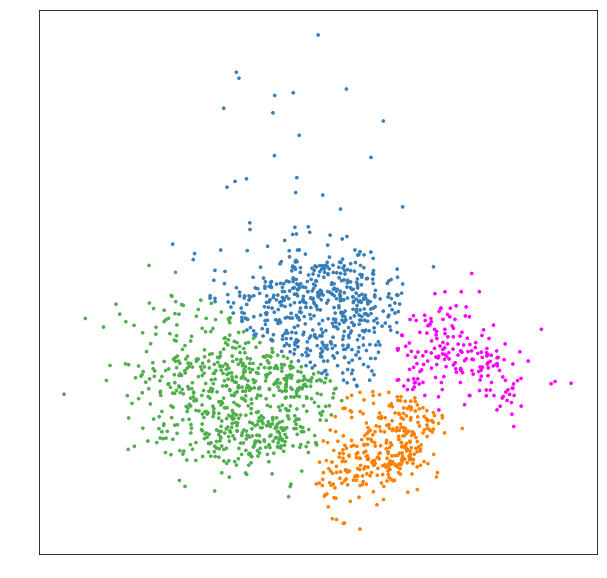

In [15]:
predictions = cluster.predict(df)

In [16]:
Counter(predictions)

Counter({0: 575, 1: 335, 2: 689, 3: 198})

In [17]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.4846394526181437

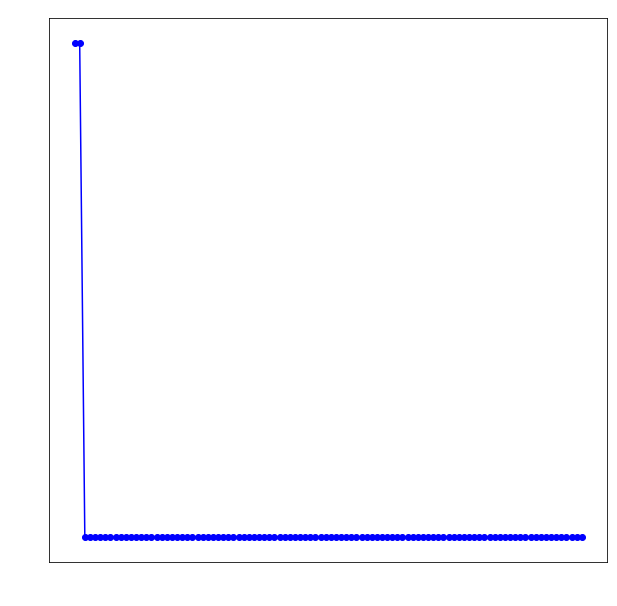

In [18]:
cluster.plot_convergence()

In [19]:
cluster.get_trajectory()

[({'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 12.0,
   'n_clusters___KMeans': 5,
   'n_components___TSNE': 2,
   'perplexity___TSNE': 30.0},
  2147483648),
 ({'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 12.0,
   'n_clusters___KMeans': 5,
   'n_components___TSNE': 2,
   'perplexity___TSNE': 30.0},
  2147483647.0),
 ({'affinity___SpectralClustering': 'laplacian',
   'algorithm___TruncatedSVD': 'randomized',
   'assign_labels___SpectralClustering': 'kmeans',
   'clustering_choice': 'SpectralClustering',
   'dim_reduction_choice': 'TruncatedSVD',
   'eigen_solver___SpectralClustering': 'arpack',
   'n_clusters___SpectralClustering': 7,
   'n_components___TruncatedSVD': 2},
  0.3100351283090242),
 ({'algorithm___FastICA': 'parallel',
   'clustering_choice': 'KMeans',
   'dim_reduction_choice': 'FastICA',
   'fun___FastICA': 'cube',
   'n_clusters___KMeans': 3,
   'n_components___Fast